**Problem Statement: Forecasting stock prices of National Stock Exchange** 

### Topics Covered
**Heuristic Methods - Naive, Seasonal_Naive, Avg, SMA, Drift**

**Exponential Smoothing - SES, DES, TES**

**Auto Regressive Methods - ARIMA, VAR**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import datetime as ds

import pandas_datareader as pdr
import datetime as dt

In [217]:
# fetching the stock price of NSEI between Jan 15th 2008 and June 7th 2021.
start = dt.datetime(2008,1,15)
end = dt.datetime(2021,6,7)

data_temp = pdr.data.get_data_yahoo('^NSEI', start, end, interval='d')

In [227]:
# Considering the Close Price
ts_data = pd.DataFrame()
ts_data['Price'] = data_temp['Close']

In [187]:
# Changing the object type to dateTime
data.Date = pd.to_datetime(data.Date,dayfirst= True)

# changing the index
ts_data = data.set_index('Date')

In [190]:
# here could see that the data captured is only on business days
# As the market closes on Saturday and Sunday, 
# the Value stays the same as Friday on these days
# so using Forward Fill to fill the values
ts_data = ts_data.asfreq('d',method='ffill')

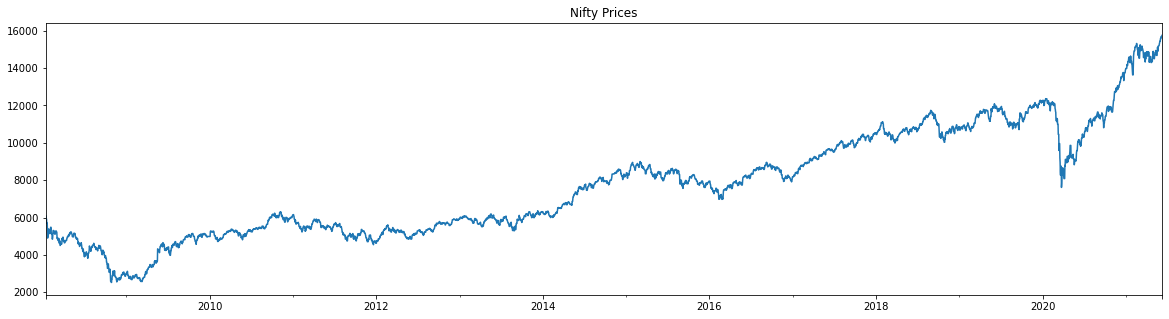

In [191]:
plt.figure(figsize= (20,5))
ts_data.Price.plot()
plt.title("Nifty Prices")
plt.xlabel('')
plt.show()

In [192]:
# Extracting the month  and year information
ts_data['year'] = pd.DatetimeIndex(ts_data.index).year.values
ts_data['month'] = pd.DatetimeIndex(ts_data.index).month.values

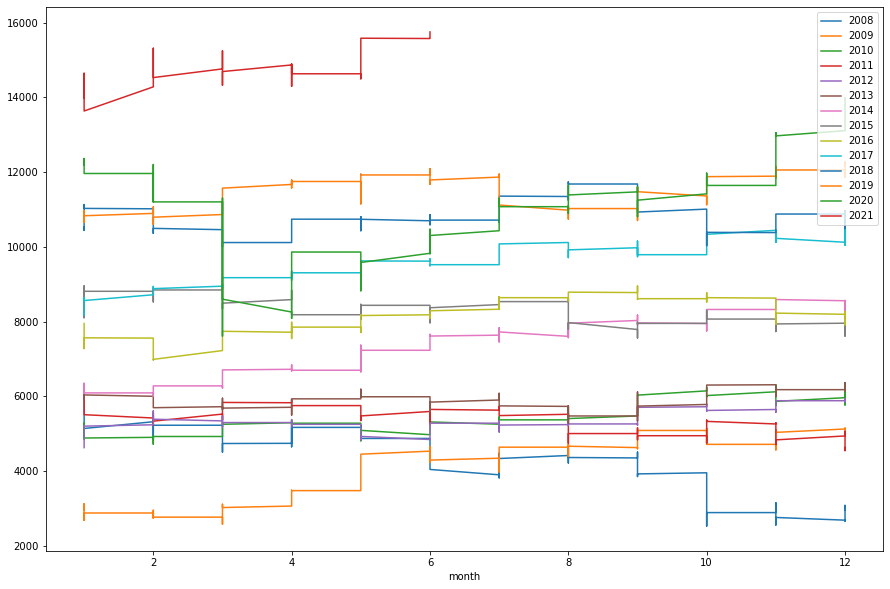

In [194]:
# ploting the year by values
fig, axes = plt.subplots(figsize = (15,10))
for year in range(2008,2022):
    
    df_temp = ts_data[['Price','month']][ts_data.year == year]
    
    df_temp.plot(x = 'month', y = 'Price',ax = axes, label = year)
 
plt.legend(loc = 'upper right')
plt.show()

**Train Test Split**

In [195]:
test_ts_data = ts_data[ts_data.index > dt.datetime(2020,6,7)]

In [196]:
ts_data = ts_data[ts_data.index < dt.datetime(2020,6,7)]

### Heuristic Methods

In [12]:
predict_df = pd.DataFrame(index = pd.date_range(start = '2020-06-08', end = '2021-06-07'))

predict_df['true'] = test_ts_data.Price

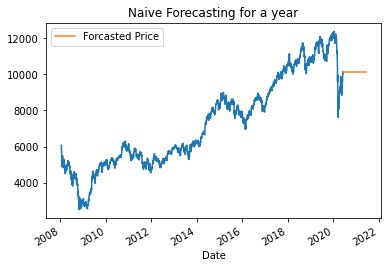

In [13]:
# a dataframe is created and a date range is generated
df = pd.DataFrame()
df['Date'] = pd.date_range(start = '2020-06-08', end = '2021-06-07')

# The last recorded price is set
df['Forcasted Price'] = ts_data.iloc[-1,0]

predict_df['Naive'] = ts_data.iloc[-1,0]

df.set_index('Date', inplace=True)

# the forecast is been plotted.
plt.plot(ts_data.Price)
df['Forcasted Price'].plot()
plt.title('Naive Forecasting for a year')
plt.legend()
plt.show()

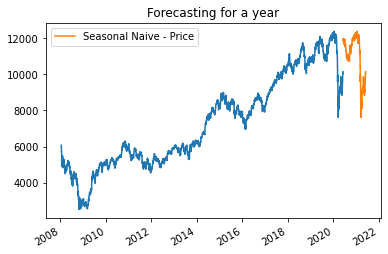

In [14]:
# frequency is changed to forecast throughout the year
tf_series_ffill = ts_data.copy()

# a dataframe is created and a date range is generated
df = pd.DataFrame()
df['Date'] = pd.date_range(start = '2020-06-07', end = '2021-06-06')
# here, the seasonal component is taken to follow a year cycle.
date_offset = df['Date'] - pd.DateOffset(years=1)
ts_df = df.set_index('Date')

# a list is created and a loop is ran to fetch the price valeus
price_list = list()
for date in date_offset:
    
    price = tf_series_ffill[date == tf_series_ffill.index].iloc[0,0]    
    price_list.append(price)

    
ts_df['Seasonal Naive - Price'] = price_list

predict_df['Seasonal_Naive'] = price_list

# the forecast is been plotted.
plt.plot(ts_data.Price)
ts_df['Seasonal Naive - Price'].plot()
plt.title('Forecasting for a year')
plt.legend()
plt.xlabel('')
plt.show()

#### Average

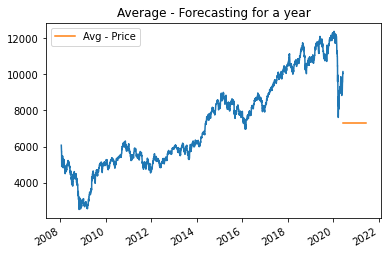

In [15]:
# a dataframe is created and a date range is generated
df = pd.DataFrame()
df['Date'] = pd.date_range(start = '2020-06-07', end = '2021-06-06')

# The average price is calculated and used as forecasting value
df['Avg - Price'] = ts_data.Price.mean()

predict_df['Avg'] = ts_data.Price.mean()

df.set_index('Date', inplace=True)

# the forecast is been plotted.
plt.plot(ts_data.Price)
df['Avg - Price'].plot()
plt.title('Average - Forecasting for a year')
plt.xlabel('')
plt.legend()
plt.show()

#### Simple Moving Average 

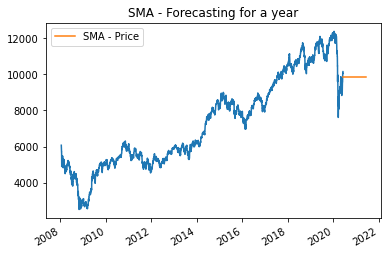

In [16]:
# a dataframe is created and a date range is generated
df = pd.DataFrame()
df['Date'] = pd.date_range(start = '2020-06-07', end = '2021-06-06')

#the lags are set to 10, so the last 10 obserations
lags = 10
# The average price is calculated and used as forecasting value
df['SMA - Price'] = ts_data.Price[-lags:].mean()

predict_df['SMA'] = ts_data.Price[-lags:].mean()

df.set_index('Date', inplace=True)

# the forecast is been plotted.
plt.plot(ts_data.Price)
df['SMA - Price'].plot()
plt.title('SMA - Forecasting for a year')
plt.xlabel('')
plt.legend()
plt.show()

#### Drift

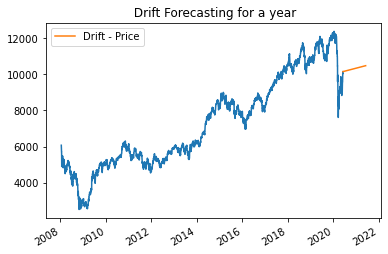

In [17]:
# a dataframe is created and a date range is generated
df = pd.DataFrame()
df['Date'] = pd.date_range('2020-06-07', end = '2021-06-06')

# from the last and first observations the day difference t
t = ts_data.tail(1).index[0] - ts_data.head(1).index[0]
t = t.days
# the first and last prices are captured. 
y1 = ts_data.head(1).iloc[0,0]
yt = ts_data.tail(1).iloc[0,0]

last_observed_day = ts_data.tail(1).index[0]
# a list is created and a loop is ran to fetch the price valeus
price_list = list()
for forcast_date in df['Date']:
    # the forecasting is done only if it is a future days
    if last_observed_day < forcast_date:
        # the date difference is calculated
        date_diff = forcast_date - last_observed_day        
        date_diff = date_diff.days      
        # the forcasted value is calculated using the formula
        forecasted_value = yt + date_diff*(yt - y1)/(t - 1)        
        price_list.append(forecasted_value)

df['Drift - Price'] = price_list

predict_df['Drift'] = price_list
df.set_index('Date', inplace=True)

# the forecast is been plotted.
plt.plot(ts_data.Price)
df['Drift - Price'].plot()
plt.title(' Drift Forecasting for a year')
plt.xlabel('')
plt.legend()
plt.show()

#### Combining all the Heuristic Models

In [18]:
# a dataframe is created and a date range is generated
forcast_df = pd.DataFrame()
date_range = pd.date_range(start = '2020-06-07', end = '2021-06-06')

forcast_df['Date'] = date_range
forcast_df.set_index('Date', inplace=True)
# The last recorded price is set
forcast_df['Naive - Price'] = ts_data.iloc[-1,0]

date_offset = date_range - pd.DateOffset(years=1)

# a list is created and a loop is ran to fetch the price valeus
price_list = list()
for date in date_offset:
    
    price = ts_data[date == ts_data.index].iloc[0,0]    
    price_list.append(price)

forcast_df['Seasonal_Naive - Price'] = price_list


forcast_df['Average - Price'] = ts_data.Price.mean()

forcast_df['Drift - Price'] = df['Drift - Price']

#the lags are set to 10, so the last 10 obserations
lags = 10
# The average price is calulated and used as forecasting value
forcast_df['SMA - Price'] = ts_data.Price[-lags:].mean()

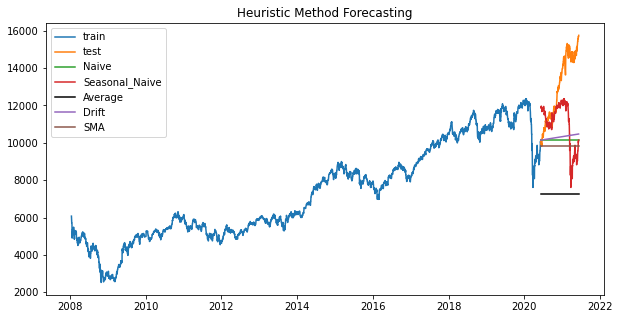

In [19]:
plt.figure(figsize=(10,5))

plt.plot(ts_data.Price, label = 'train')
plt.plot(test_ts_data.Price,label = 'test')
plt.plot(forcast_df['Naive - Price'], label = 'Naive')
plt.plot(forcast_df['Seasonal_Naive - Price'], label = 'Seasonal_Naive')
plt.plot(forcast_df['Average - Price'], label = 'Average', color = 'black')
plt.plot(forcast_df['Drift - Price'], label = 'Drift')
plt.plot(forcast_df['SMA - Price'], label = 'SMA')

plt.title('Heuristic Method Forecasting')
plt.legend()
plt.show()


### Smoothing for NSEI

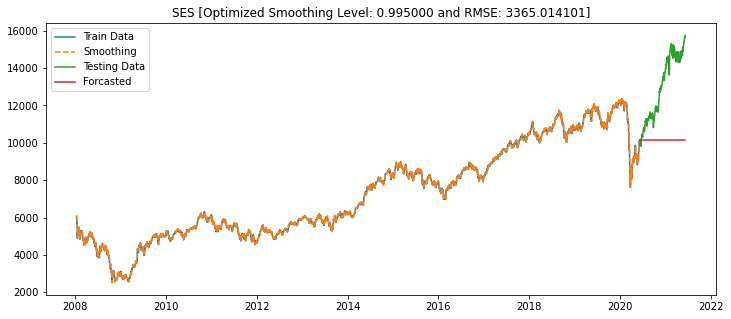

In [208]:
# the price is being fitted to Single Smoothing with trend as add
sem = SimpleExpSmoothing(ts_data['Price'])
sem_fit = sem.fit(optimized=True)

# Forcasting is been done
y_forcast = sem_fit.forecast(len(test_ts_data))   

predict_df['SES'] = y_forcast.values

# Calculating Performance Metric - RMSE
rms = np.sqrt(mean_squared_error(test_ts_data['Price'], y_forcast))

# the train data and smoothing data are plotted
plt.figure(figsize=(12,5))
plt.plot(ts_data['Price'], label = 'Train Data')
plt.plot(sem_fit.fittedvalues, '--', label = 'Smoothing')

# the test data and forecasted data are plotted
plt.plot(test_ts_data['Price'], label = 'Testing Data')
plt.plot(y_forcast, label = 'Forcasted')

plt.title('SES [Optimized Smoothing Level: %f and RMSE: %f]'%(sem_fit.model.params['smoothing_level'],rms))

plt.legend()
plt.show()

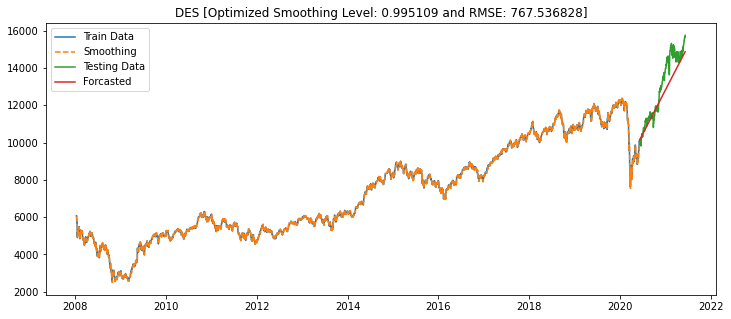

In [209]:
# the price is being fitted to Single Smoothing with trend as add
dem = ExponentialSmoothing(ts_data['Price'],trend = 'add')
dem_fit = dem.fit(optimized=True)

# Forcasting is been done
y_forcast = dem_fit.forecast(len(test_ts_data))                                            

predict_df['DES'] = y_forcast.values

# Calculating Performance Metric - RMSE
rms = np.sqrt(mean_squared_error(test_ts_data['Price'], y_forcast))

# the train data and smoothing data are plotted
plt.figure(figsize=(12,5))
plt.plot(ts_data['Price'], label = 'Train Data')
plt.plot(dem_fit.fittedvalues,'--', label = 'Smoothing')

# the test data and forecasted data are plotted
plt.plot(test_ts_data['Price'], label = 'Testing Data')
plt.plot(y_forcast, label = 'Forcasted')

plt.title('DES [Optimized Smoothing Level: %f and RMSE: %f]'%(dem_fit.model.params['smoothing_level'],rms))

plt.legend()
plt.show()

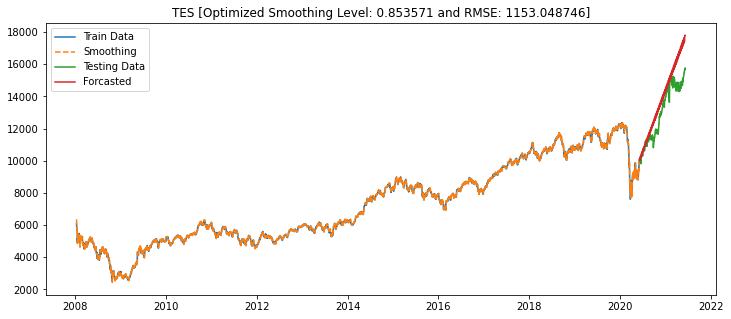

In [206]:
# the price is being fitted to Single Smoothing with trend as mul
tem = ExponentialSmoothing(ts_data['Price'],trend = 'add', seasonal ='mul')
tem_fit = tem.fit(optimized=True)

# Forcasting is been done
y_forcast = tem_fit.forecast(len(test_ts_data)) 

predict_df['TES'] = y_forcast.values

# Calculating Performance Metric - RMSE
rms = np.sqrt(mean_squared_error(test_ts_data['Price'], y_forcast))

# the train data and smoothing data are plotted
plt.figure(figsize=(12,5))
plt.plot(ts_data['Price'], label = 'Train Data')
plt.plot(tem_fit.fittedvalues, '--', label = 'Smoothing')

# the test data and forecasted data are plotted
plt.plot(test_ts_data['Price'], label = 'Testing Data')
plt.plot(y_forcast, label = 'Forcasted')

plt.title('TES [Optimized Smoothing Level: %f and RMSE: %f]'%(tem_fit.model.params['smoothing_level'],rms))

plt.legend()
plt.show()

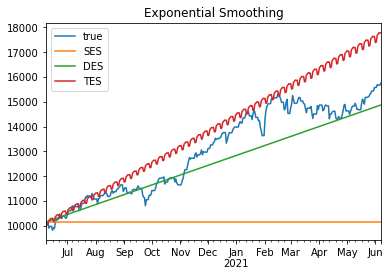

In [210]:
predict_df[['true','SES','DES','TES']].plot()

plt.title('Exponential Smoothing')
plt.show()

#### Regressive Models

In [30]:
from statsmodels.tsa.stattools import adfuller

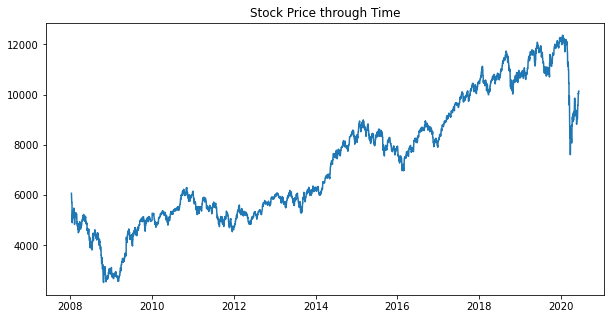

In [31]:
plt.figure(figsize = (10,5))
plt.plot(ts_data['Price'])
plt.title('Stock Price through Time')
plt.show()

In [197]:
# Indexing the Data
ts_data = ts_data[['Price']]

#### Checking Augmented Dickey Fuller Testing for Stationarity

In [38]:
def stat_ad_fuller(tf):
    
    from statsmodels.tsa.stattools import adfuller

    test_output = adfuller(tf)

    print('ADF Statistic: ', test_output[0])

    print('p-value: ', test_output[1])

    print('Critial Values: ', test_output[4])

#### As the time series is not stationary we need apply transformation

**Here as we have trend in the data we can do a differencing transformation**

**Using differencing**

In [216]:
# applying differencing to the dataframe
diff_ts_data = ts_data.diff(periods=1)[1:]

diff_ts_data = diff_ts_data[1:]

stat_ad_fuller(diff_ts_data)

ADF Statistic:  -12.101507891361594
p-value:  2.0133670298713122e-22
Critial Values:  {'1%': -3.431805625873831, '5%': -2.8621832133297374, '10%': -2.5671123859658675}


**differencing has made the time series stationary**

**Now as the time series is stationary we can use Regression Models**

**For the Optimal lags, we can use ACF and PACF Plots**

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

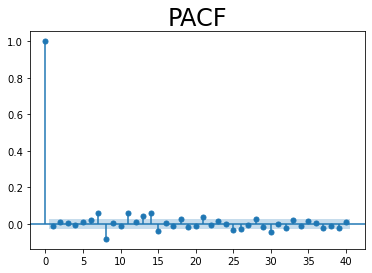

In [146]:
plot_pacf(diff_ts_data,lags= 40,method = 'ols')
plt.title("PACF", size = 24)
plt.show()

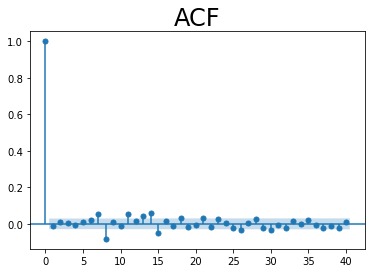

In [147]:
plot_acf(diff_ts_data,lags= 40)
plt.title("ACF", size = 24)
plt.show()

In [47]:
# importing ARIMA from stats models
from statsmodels.tsa.arima.model import ARIMA

# the Order(p,d,q) helps us to implement all the models
# 1,1,0 means ARIMA(1,1,0) model
model = ARIMA(ts_data, order=(1,1,0))

result = model.fit()

forcast_values = result.forecast(365)

predicted = result.predict(start = dt.datetime(year = 2008, month = 1, day = 17), 
               end = dt.datetime(year = 2020, month = 6, day = 6))

predict_df['ARIMA'] = forcast_values.values

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 4527
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -25881.008
Date:                Tue, 03 Aug 2021   AIC                          51766.016
Time:                        10:24:05   BIC                          51778.851
Sample:                    01-15-2008   HQIC                         51770.537
                         - 06-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0096      0.008     -1.136      0.256      -0.026       0.007
sigma2      5421.6635     29.142    186.042      0.000    5364.546    5478.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            155873.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

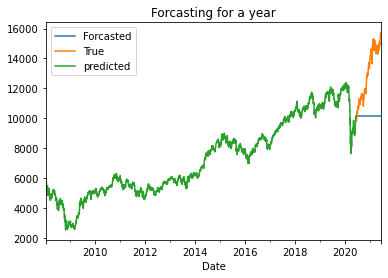

In [48]:
forcast_values.plot(label = 'Forcasted')
test_ts_data['Price'].plot(label = 'True')
predicted.plot(label = 'predicted')
plt.title('Forcasting for a year')

plt.legend()
plt.show()

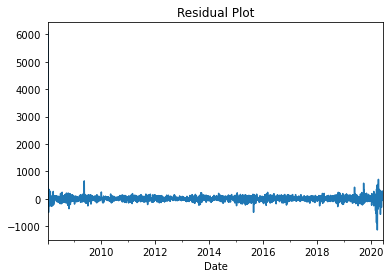

In [49]:
result.resid.plot()

plt.title('Residual Plot')

plt.show()

**Using Auto-ARIMA Model**

In [50]:
# Import pmdarima for autoarima
from pmdarima import auto_arima

# auto arima
auto_arima(ts_data,start_p = 0, start_q = 0,
              max_p=3, max_d=3,max_q=3,seasonal = True, trace=True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=51765.758, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=51767.329, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=51767.351, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=51764.432, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=51769.092, Time=1.47 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.948 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [211]:
# importing ARIMA from stats models
from statsmodels.tsa.arima.model import ARIMA
# the Order(p,d,q) helps us to implement all the models
# 0,1,0 means ARIMA(0,1,0) model
model = ARIMA(ts_data, order=(0,1,0))

result = model.fit()

forcast_values = result.forecast(365)

predicted = result.predict(start = dt.datetime(year = 2008, month = 1, day = 17), 
               end = dt.datetime(year = 2020, month = 6, day = 6))

predict_df['ARIMA'] = forcast_values.values

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 4527
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -25881.216
Date:                Tue, 03 Aug 2021   AIC                          51764.432
Time:                        13:55:46   BIC                          51770.850
Sample:                    01-15-2008   HQIC                         51766.693
                         - 06-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5423.9848     29.157    186.026      0.000    5366.838    5481.132
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):            155883.31
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

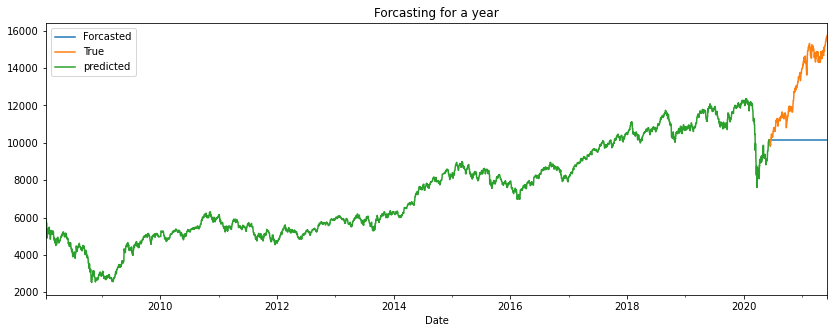

In [212]:
plt.figure(figsize = (14,5))
forcast_values.plot(label = 'Forcasted')
test_ts_data['Price'].plot(label = 'True')
predicted.plot(label = 'predicted')
plt.title('Forcasting for a year')

plt.legend()
plt.show()

**Validation Metric**

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
column_names = predict_df.iloc[:,1:].columns.values
rmse_list = list()
for column in column_names:
    
    rmse = np.sqrt(mean_squared_error(predict_df['true'], predict_df[column]))
    
    rmse_list.append(rmse)

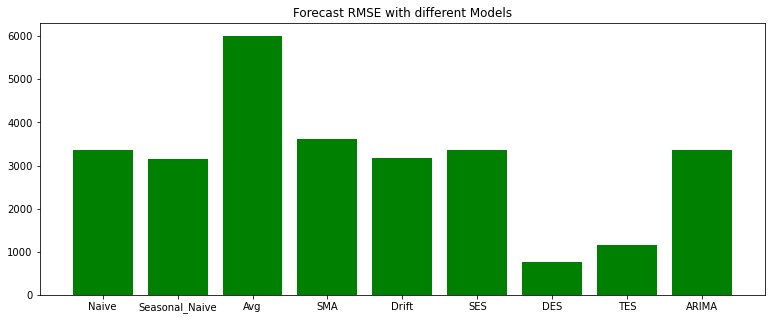

In [59]:
plt.figure(figsize=(13,5))

plt.bar(column_names,rmse_list, color = 'Green')

plt.title('Forecast RMSE with different Models')

plt.show()

In [137]:
validation_data = pd.DataFrame()

validation_data['Model'] = column_names

validation_data['RMSE'] = rmse_list

validation_data

,Model,RMSE
0,Naive,3365.011677
1,Seasonal_Naive,3159.068296
2,Avg,6005.468493
3,SMA,3626.879143
4,Drift,3177.285799
5,SES,3365.014101
6,DES,767.536828
7,TES,1153.048746
8,ARIMA,3365.011677


**Residual Plotting of ARIMA Model**

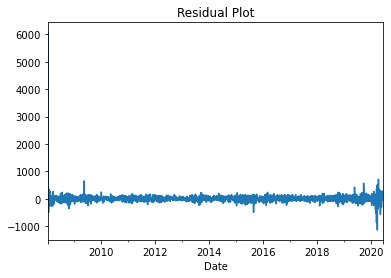

In [213]:
result.resid.plot()

plt.title('Residual Plot')

plt.show()

#### Volatility Check

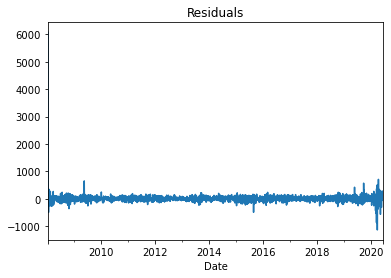

In [214]:
result.resid.plot()

plt.title('Residuals')
plt.show()

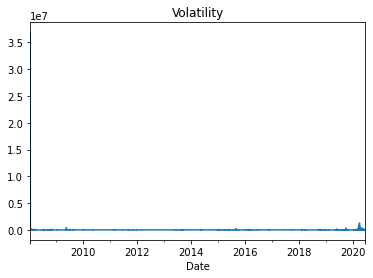

In [215]:
(result.resid**2).plot()

plt.title('Volatility')
plt.show()

**Could see that the variance in the data is captured by the Model**

**So, we need not use Autoregressive conditional heteroskedasticity Models in this case**

**Causuality**

In [158]:
# fetching the stock price of TCS between Jan 15th 2008 and June 7th 2021.
start = dt.datetime(2008,1,15)
end = dt.datetime(2021,6,7)

data_temp = pdr.data.get_data_yahoo('TCS.NS', start, end, interval='d')

**TCS Stock**

In [177]:
ts_data_tcs = pd.DataFrame()
ts_data_tcs['Price'] = data_temp['Close']

ts_data_tcs.Price.fillna(method = 'ffill', inplace=True)
ts_data_tcs = ts_data_tcs.asfreq('d',method='ffill')

test_ts_data_tcs = ts_data_tcs[ts_data_tcs.index > dt.datetime(2020,6,7)]

ts_data_tcs = ts_data_tcs[ts_data_tcs.index < dt.datetime(2020,6,7)]

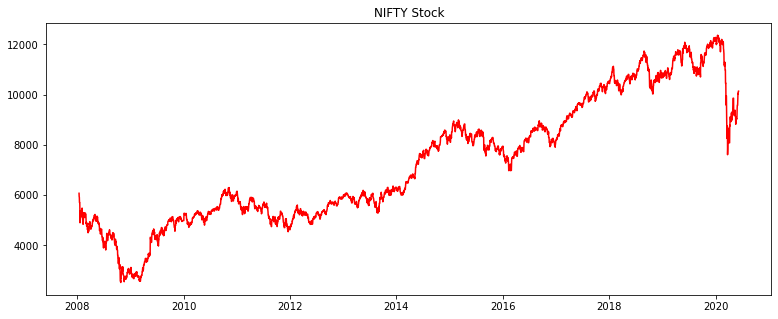

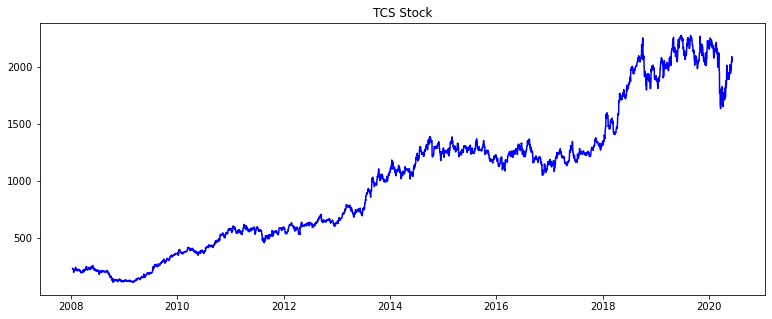

In [178]:
plt.figure(figsize=(13,5))
plt.plot(ts_data, label = 'NIFTY', color = 'Red')

plt.title('NIFTY Stock')

plt.figure(figsize=(13,5))

plt.plot(ts_data_tcs, label = 'TCS', color = 'Blue')

plt.title('TCS Stock')

plt.show()

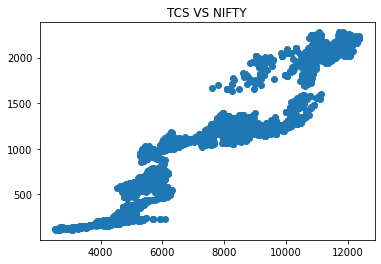

In [179]:
plt.scatter(ts_data,ts_data_tcs)

plt.title('TCS VS NIFTY')
plt.show()

In [174]:
 from statsmodels.tsa.stattools import grangercausalitytests

In [180]:
causuality_df = pd.DataFrame()

causuality_df['NIFTY_price'] = ts_data.Price
causuality_df['TCS_price'] = ts_data_tcs.Price

In [181]:
granger_output = grangercausalitytests(causuality_df, maxlag = 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8867  , p=0.0894  , df_denom=4523, df_num=1
ssr based chi2 test:   chi2=2.8886  , p=0.0892  , df=1
likelihood ratio test: chi2=2.8877  , p=0.0893  , df=1
parameter F test:         F=2.8867  , p=0.0894  , df_denom=4523, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6714  , p=0.1881  , df_denom=4520, df_num=2
ssr based chi2 test:   chi2=3.3464  , p=0.1876  , df=2
likelihood ratio test: chi2=3.3452  , p=0.1878  , df=2
parameter F test:         F=1.6714  , p=0.1881  , df_denom=4520, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5991  , p=0.1874  , df_denom=4517, df_num=3
ssr based chi2 test:   chi2=4.8046  , p=0.1867  , df=3
likelihood ratio test: chi2=4.8021  , p=0.1869  , df=3
parameter F test:         F=1.5991  , p=0.1874  , df_denom=4517, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8862  , p=0.

**Could see a granger casusality at lag 4**

**So we can use it in VAR Modelling**

**Checking for Stationarity**

In [170]:
stat_ad_fuller(ts_data_tcs)

ADF Statistic:  -0.28387199426306214
p-value:  0.9277576841084645
Critial Values:  {'1%': -3.431804330957036, '5%': -2.862182641270546, '10%': -2.567112081431645}


In [171]:
# applying differentiation to the dataframe
diff_ts_data_tcs = ts_data_tcs.diff(periods=1)[1:]

diff_ts_data_tcs = diff_ts_data_tcs[1:]

stat_ad_fuller(diff_ts_data_tcs)

ADF Statistic:  -14.879464931246748
p-value:  1.6176381747986976e-27
Critial Values:  {'1%': -3.431804654470196, '5%': -2.862182784189927, '10%': -2.5671121575144014}


**Could see that the TCS stock is stationarized with first order differentiation**

In [173]:
diff_causuality_df = pd.DataFrame()

diff_causuality_df['NIFTY_price'] = diff_ts_data.Price
diff_causuality_df['TCS_price'] = diff_ts_data_tcs.Price

**Now we can implement VAR Model**

In [121]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [185]:
model = VAR(diff_causuality_df)

model_fit = model.fit(maxlags = 4)

model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Aug, 2021
Time:                     13:35:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.9776
Nobs:                     4521.00    HQIC:                   13.9610
Log likelihood:          -44350.6    FPE:                1.14629e+06
AIC:                      13.9520    Det(Omega_mle):     1.14174e+06
--------------------------------------------------------------------
Results for equation NIFTY_price
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  1.002204         1.095759            0.915           0.360
L1.NIFTY_price        -0.015623         0.016355           -0.955           0.339
L1.TCS_price           0.067457         0.075393  